In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("Sample - Superstore.xls")

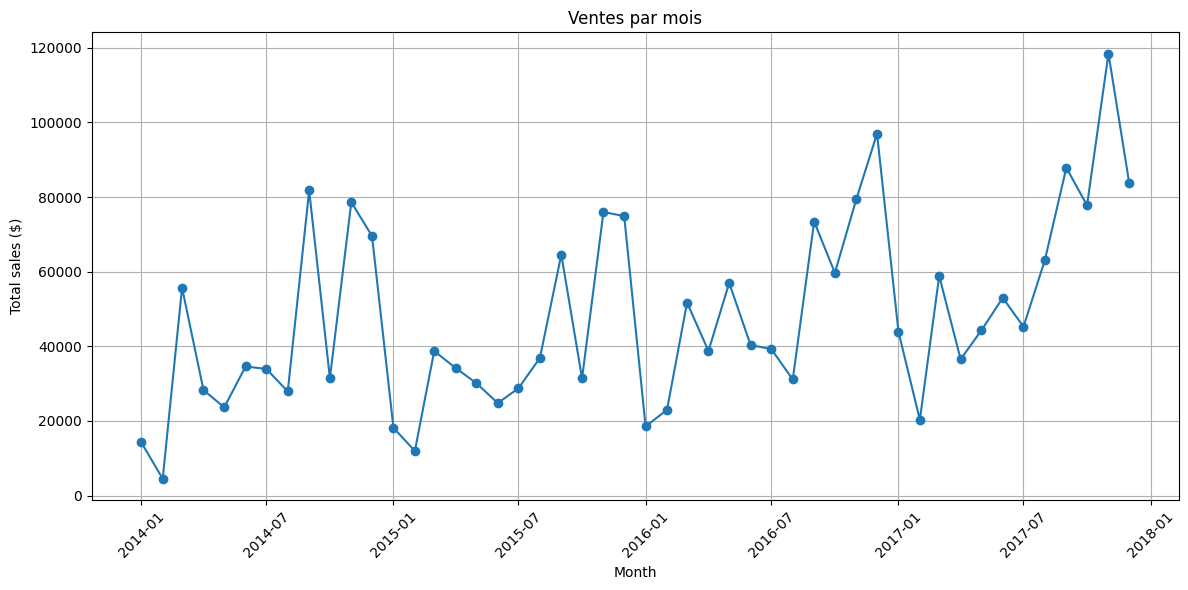

In [62]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

ms = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(ms.index, ms.values, marker='o')
plt.title('Ventes par mois')
plt.xlabel('Month')
plt.ylabel('Total sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

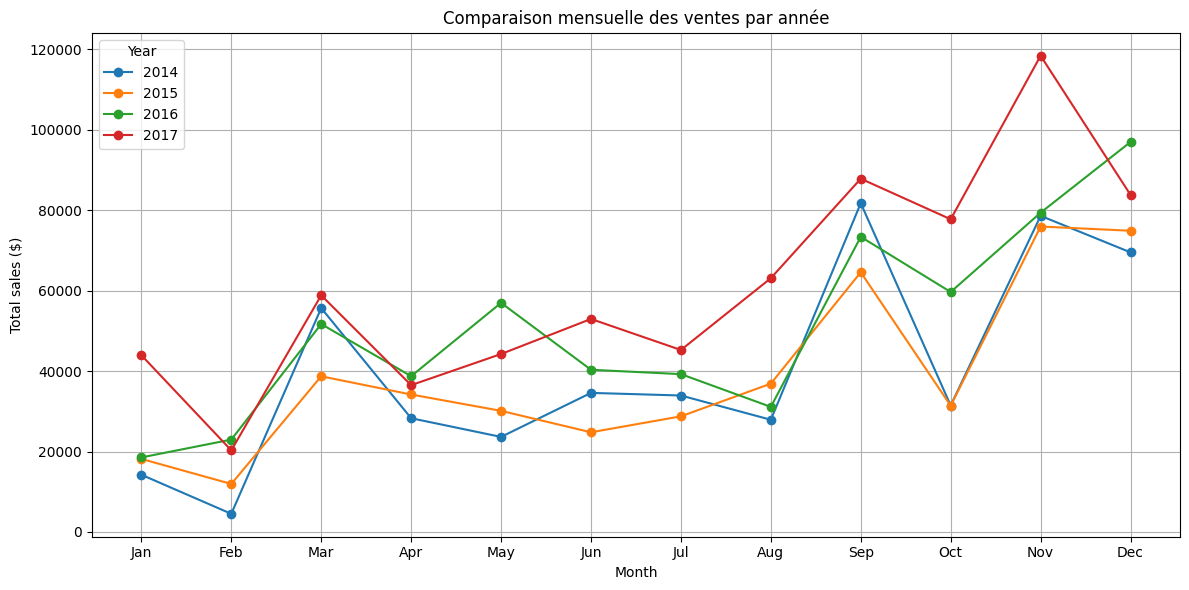

In [65]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

grouped = df.groupby(['Year', 'Month'])['Sales'].sum().unstack(level=0)

plt.figure(figsize=(12, 6))
for year in grouped.columns:
    plt.plot(grouped.index, grouped[year], marker='o', label=str(year))

plt.title('Comparaison mensuelle des ventes par année')
plt.xlabel('Month')
plt.ylabel('Total sales ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Ventes par état**

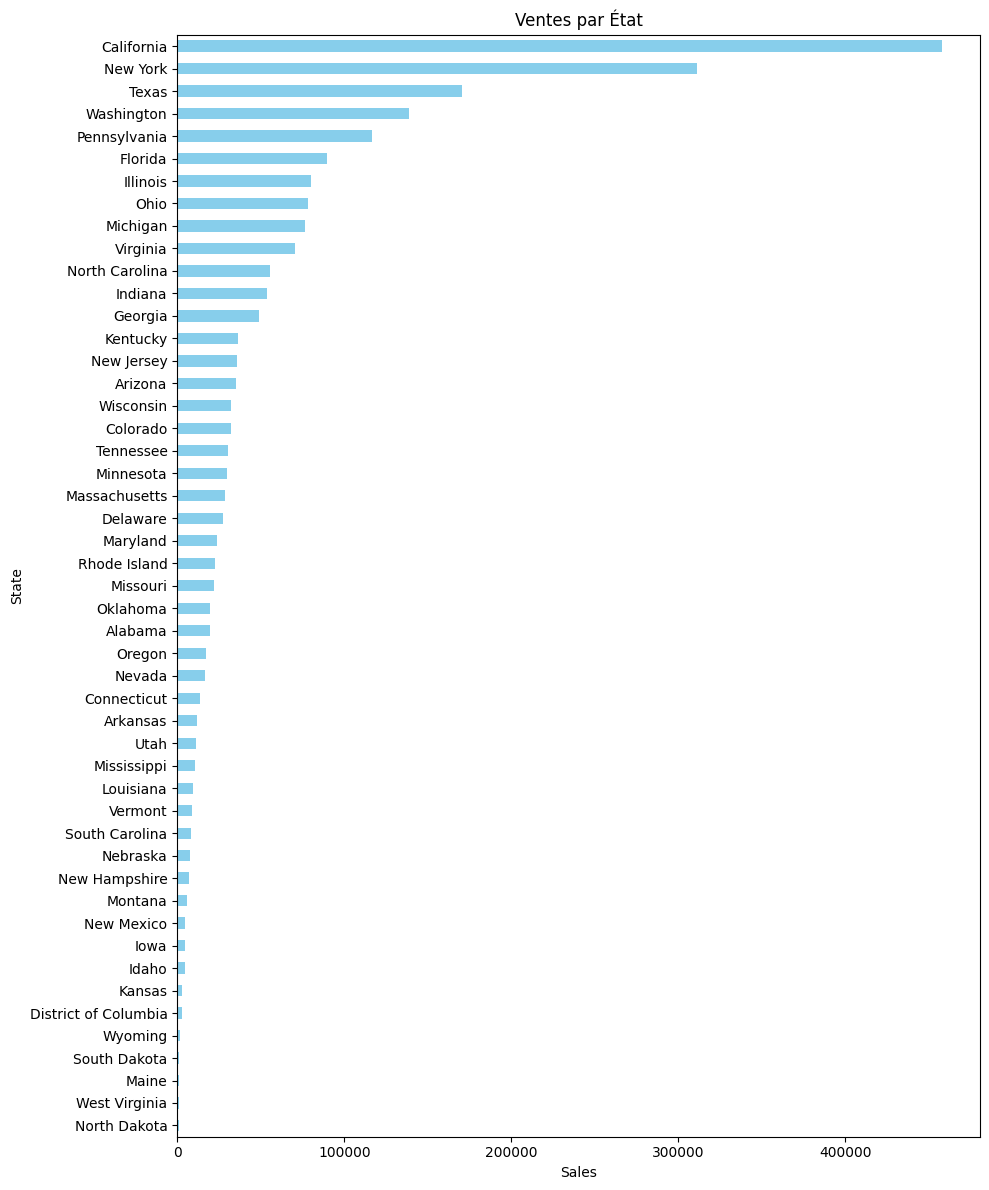

In [66]:
ventes_par_etat = df.groupby("State")["Sales"].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 12))
ventes_par_etat.plot(kind="barh", color="skyblue")
plt.title("Ventes par État")
plt.xlabel("Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()

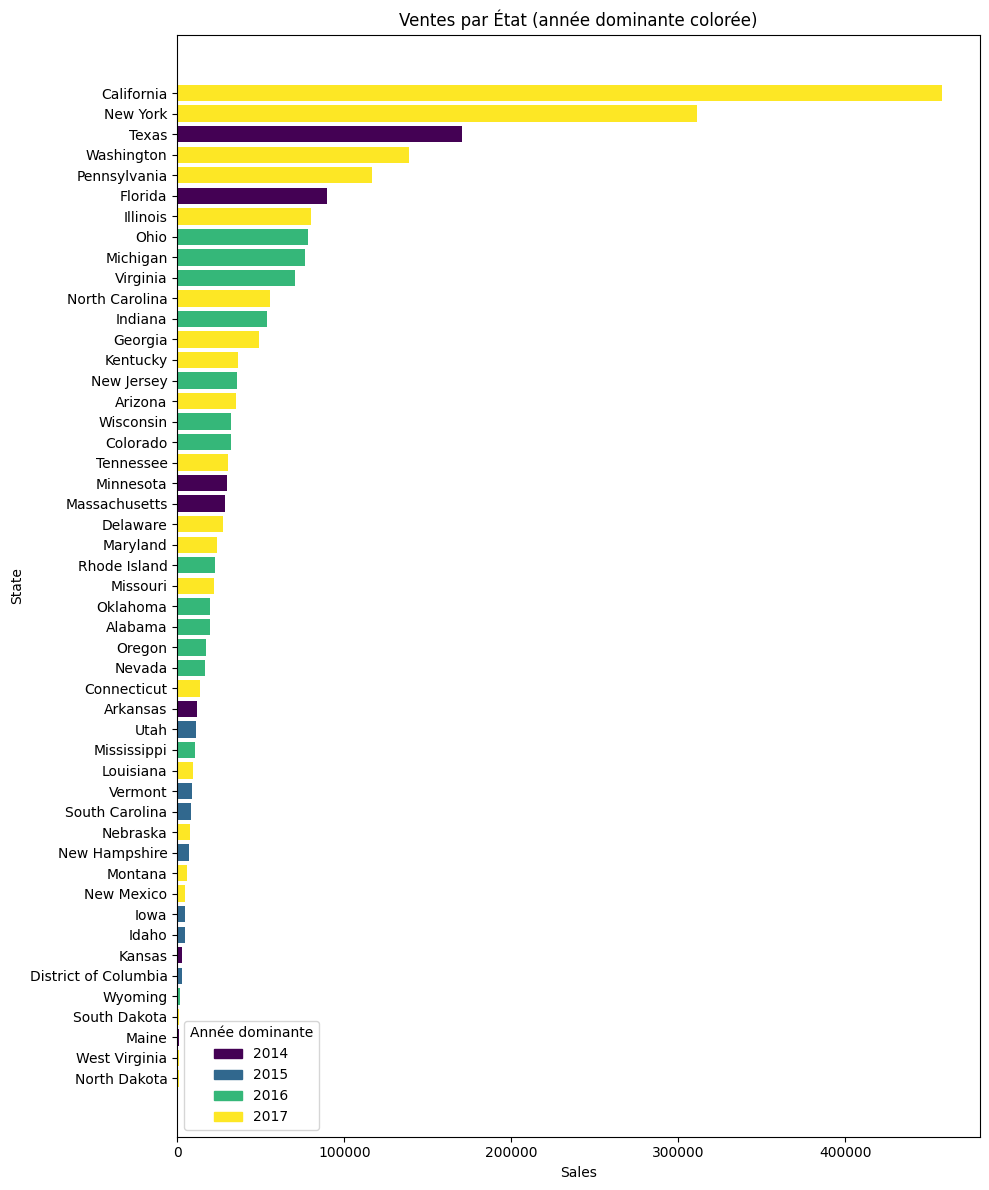

In [67]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

sbsy = df.groupby(['State', 'Year'])['Sales'].sum().unstack(fill_value=0)

dmnt_year = sbsy.idxmax(axis=1)

sa_etat = sbsy.sum(axis=1).sort_values(ascending=True)

uniq = sorted(sbsy.columns)

colors_map = {year: color for year, color in zip(uniq, plt.cm.viridis(np.linspace(0, 1, len(uniq))))}


colors = [colors_map[dmnt_year.loc[state]] for state in sa_etat.index]

plt.figure(figsize=(10, 12))
plt.barh(sa_etat.index, sa_etat.values, color=colors)
plt.title("Ventes par État (année dominante colorée)")
plt.xlabel("Sales")
plt.ylabel("State")


handles = [plt.Rectangle((0,0),1,1, color=colors_map[year]) for year in uniq]
labels = [str(year) for year in uniq]
plt.legend(handles, labels, title="Année dominante")

plt.tight_layout()
plt.show()

# **Scatter Plot - Sales VS Profit**

Permet de repérer les produits avec ventes élevées mais faible profit (candidat à des ajustements de prix). On peut également voir s'il y a une corrélation entre chiffre d'affaire et rentabilité.

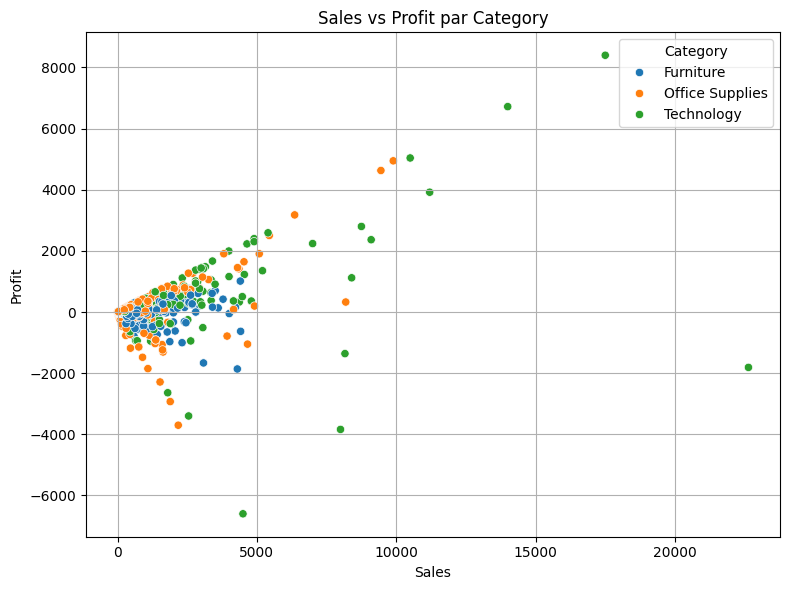

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit par Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Boxplot - Répartition des profits par région**

Permet d'idenitifer les régions avec haute volatilité des profits (risques et/ou opportunités). On peut ensuite mettre en place un ciblage stratégique sur les régions stables et rentables.

<ipython-input-51-71316ddf914e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Profit", palette="Set2")


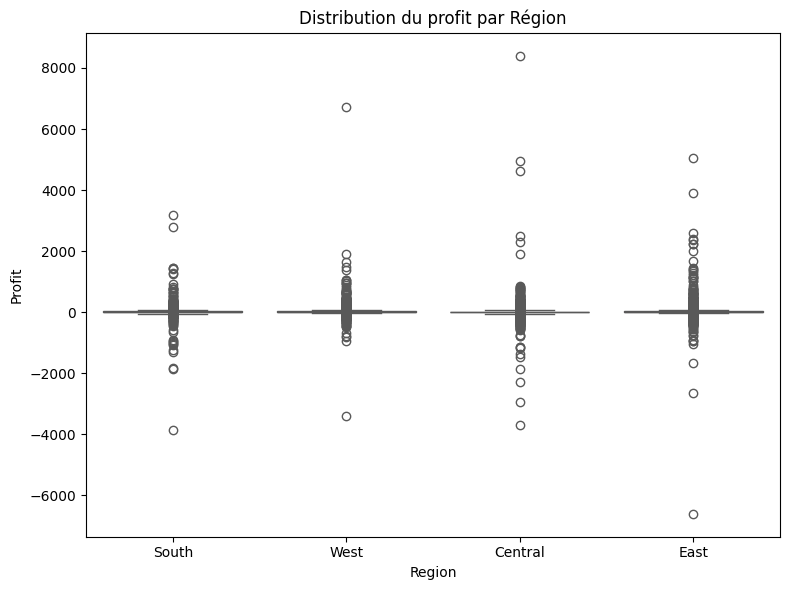

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Region", y="Profit", palette="Set2")
plt.title("Distribution du profit par Région")
plt.ylabel("Profit")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

# **Heatmap1 - Corrélation entre variables numériques**

Permet d'aider à ajuster les stratégies de pricing et promotions. On analyse ici 4 colonnes du dataframe.

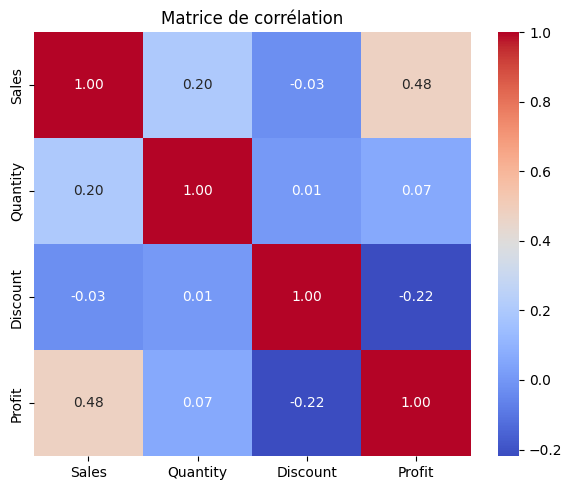

In [52]:
corr = df[["Sales", "Quantity", "Discount", "Profit"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# **Heatmap2 - Ventes par région et catégorie**

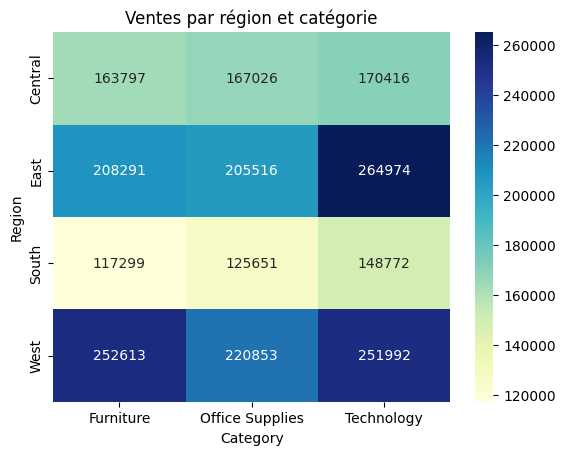

In [53]:
pivot1 = df.pivot_table(values="Sales", index="Region", columns="Category", aggfunc="sum")
sns.heatmap(pivot1, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Ventes par région et catégorie")
plt.show()

# **Heatmap3 - Profit par segment et mode de livraison**

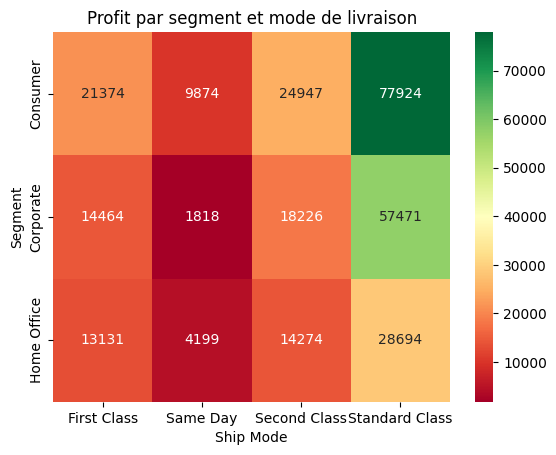

In [54]:
pivot2 = df.pivot_table(values="Profit", index="Segment", columns="Ship Mode", aggfunc="sum")
sns.heatmap(pivot2, annot=True, fmt=".0f", cmap="RdYlGn")
plt.title("Profit par segment et mode de livraison")
plt.show()

# **Heatmap4 - Nombre de commandes par année et catégorie**

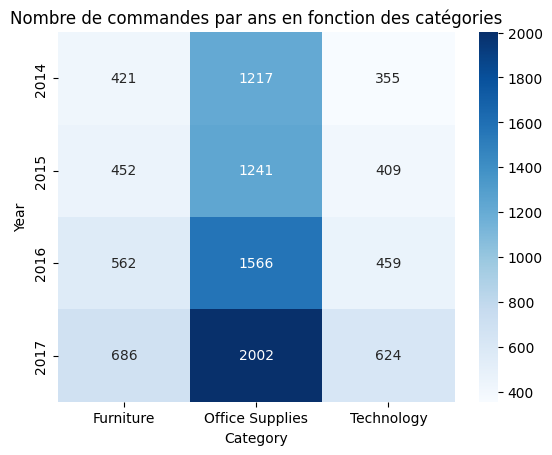

In [55]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Year"] = df["Order Date"].dt.year
pivot3 = df.pivot_table(values="Order ID", index="Year", columns="Category", aggfunc="count")
sns.heatmap(pivot3, annot=True, fmt=".0f", cmap="Blues")
plt.title("Nombre de commandes par ans en fonction des catégories")
plt.show()

# **Heatmap5 - Discount moyen par région et catégorie**

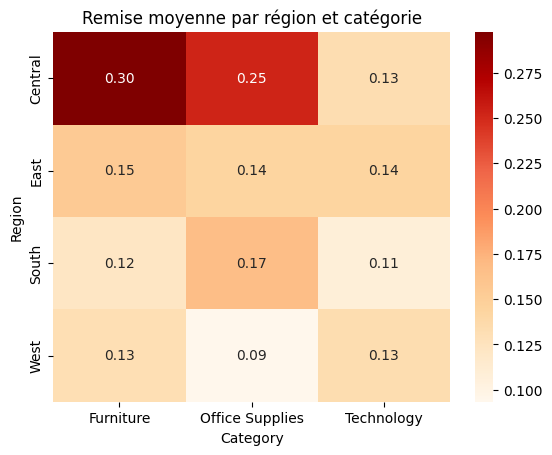

In [56]:
pivot4 = df.pivot_table(values="Discount", index="Region", columns="Category", aggfunc="mean")
sns.heatmap(pivot4, annot=True, fmt=".2f", cmap="OrRd")
plt.title("Remise moyenne par région et catégorie")
plt.show()

# **Barplot - Ventes moyennes par Segment**

Permet d'identifier les segments clients les plus rentables, et donc de cibler le marketing et les promotions.

<ipython-input-57-78c531e76a78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Segment", y="Sales", estimator='mean', palette="pastel")


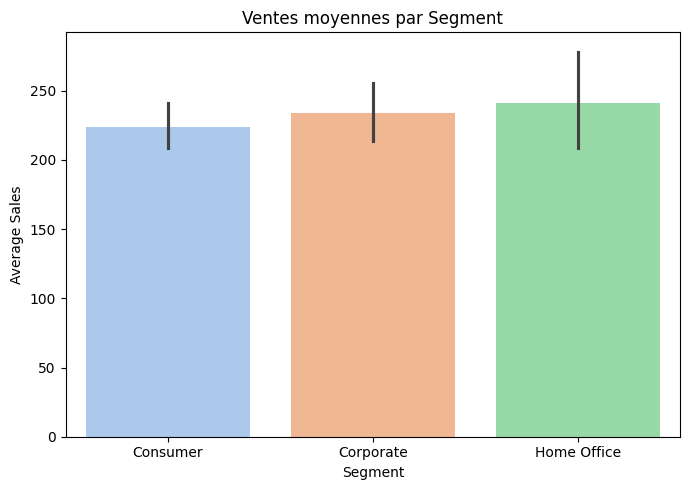

In [57]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="Segment", y="Sales", estimator='mean', palette="pastel")
plt.title("Ventes moyennes par Segment")
plt.xlabel("Segment")
plt.ylabel("Average Sales")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()

# **ViolonPlot - Profit par Catégorie**

Permet de distinguer les catégories à forte variabilité de marge. Par exemple, on pourrait se demander si les technologies ne sont pas trop risquées pour la vente...

<ipython-input-58-aebb5cc88b52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Category", y="Profit", palette="muted")


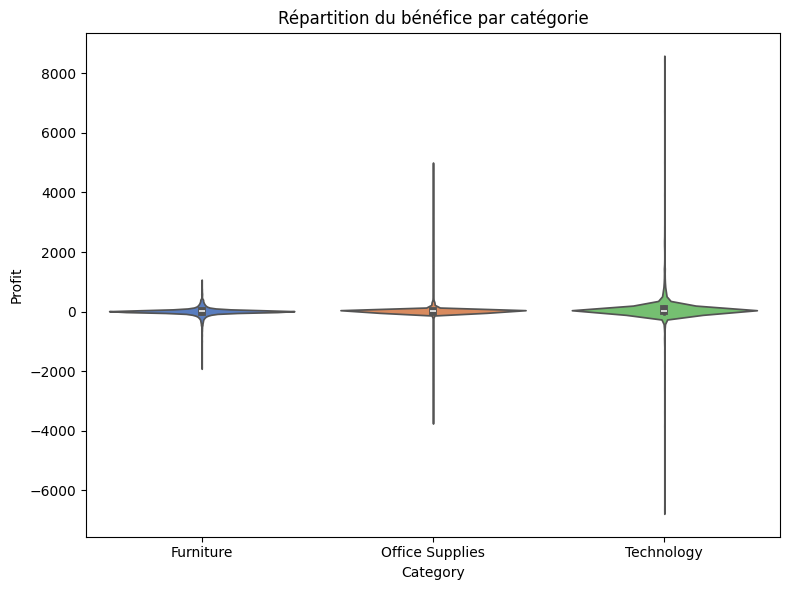

In [58]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Category", y="Profit", palette="muted")
plt.title("Répartition du bénéfice par catégorie")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

# **Boxplot - Délai de livraison par région**

Permet de repérer les régions à optimiser logistiquement. A priori, les délais de livraisons sont les mêmes suivant les régions.

<ipython-input-21-2eb1ffb0804e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Delivery Time (days)", palette="Set3")


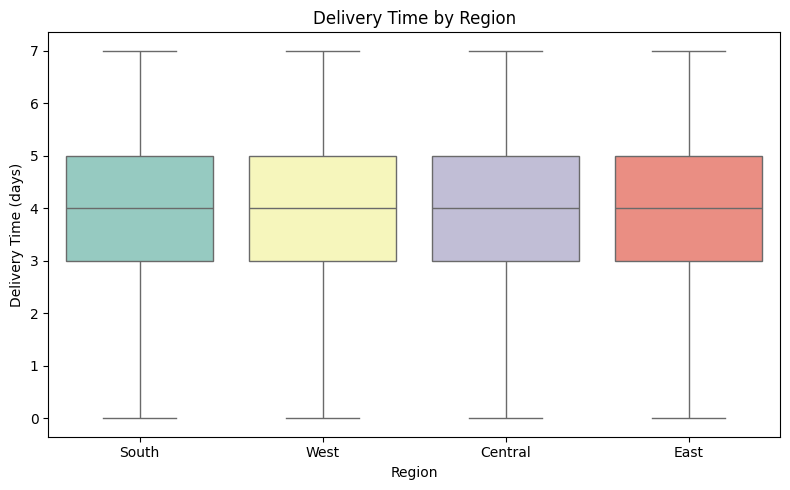

In [21]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Delivery Time (days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Region", y="Delivery Time (days)", palette="Set3")
plt.title("Délais de livraison par région")
plt.ylabel("Delivery Time (days)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

# **Horizontal Barplot - Top 10 villes en vente**

Il faut privilégier le stock, les offres commercialles et la logistique dans ces villes, afin qu'elles restent performantes.

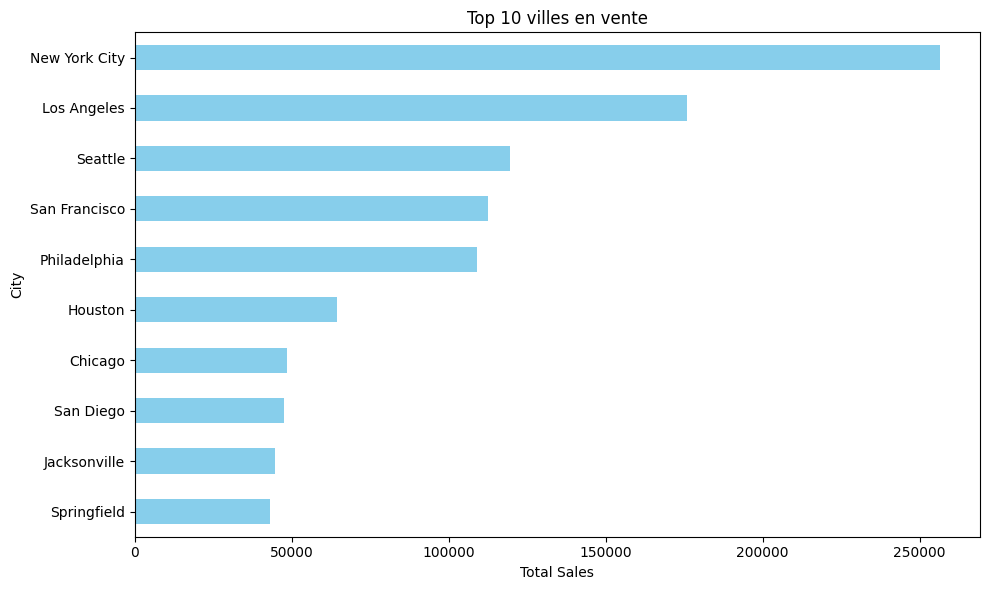

In [59]:
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='barh', color="skyblue")
plt.title("Top 10 villes en vente")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **Countplot - Fréquence des modes d'expédition**

Permet de voir les préférence client pour l'expédition. On peut ajuster les offres de livraisons ou négocier les coûts transporteurs.

<ipython-input-60-daeef62ba1fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Ship Mode", palette="coolwarm")


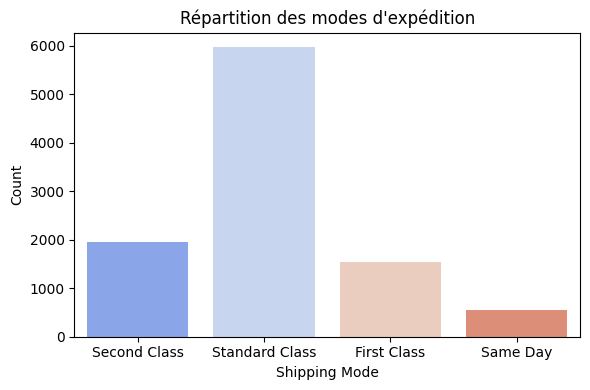

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Ship Mode", palette="coolwarm")
plt.title("Répartition des modes d'expédition")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()